In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [9]:
sns.set(style="darkgrid", color_codes=True)
pd.set_option('display.max_columns', 75)

In [12]:
import pandas as pd

In [14]:
df = pd.read_excel('/kaggle/input/market-basket-analysis/Assignment-1_Data.xlsx', header = None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522065 entries, 0 to 522064
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   0       522065 non-null  object
 1   1       520610 non-null  object
 2   2       522065 non-null  object
 3   3       522065 non-null  object
 4   4       522065 non-null  object
 5   5       388024 non-null  object
 6   6       522065 non-null  object
dtypes: object(7)
memory usage: 27.9+ MB


In [15]:
df.head()

,0,1,2,3,4,5,6
0,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
1,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
2,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
3,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
4,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [16]:
df.describe()

,0,1,2,3,4,5,6
count,522065,520610,522065,522065,522065.00,388024,522065
unique,21664,4186,691,19642,1286.00,4298,31
top,573585,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-10-31 14:41:00,1.25,17841,United Kingdom
freq,1114,2269,147848,1114,48778.00,7847,487622


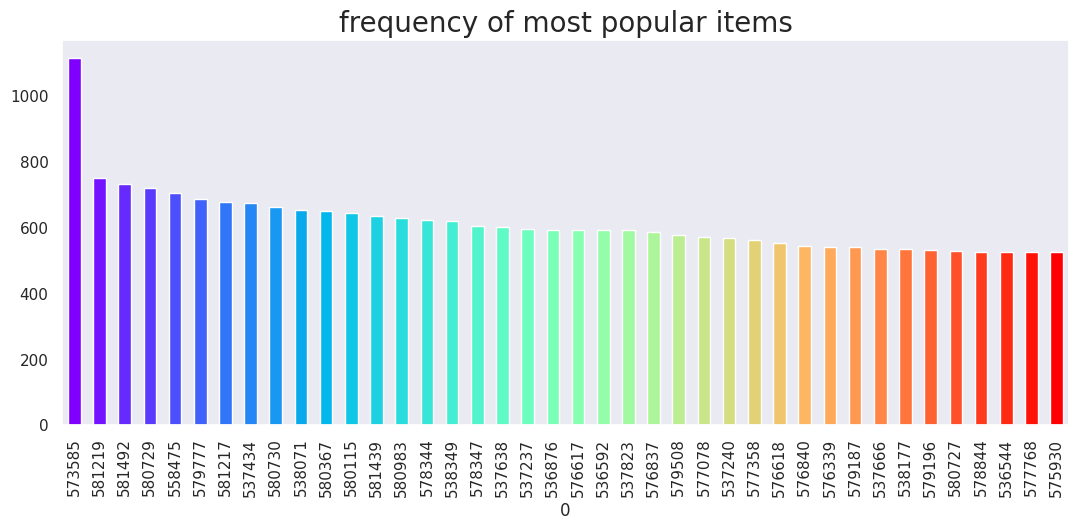

In [18]:
color = plt.cm.rainbow(np.linspace(0, 1, 40))
df[0].value_counts().head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [25]:
import networkx as nx
df['things'] = 'things'
things = df.truncate(before = -1, after = 15)
things = nx.from_pandas_edgelist(things, source = 'things', target = 0, edge_attr = True)

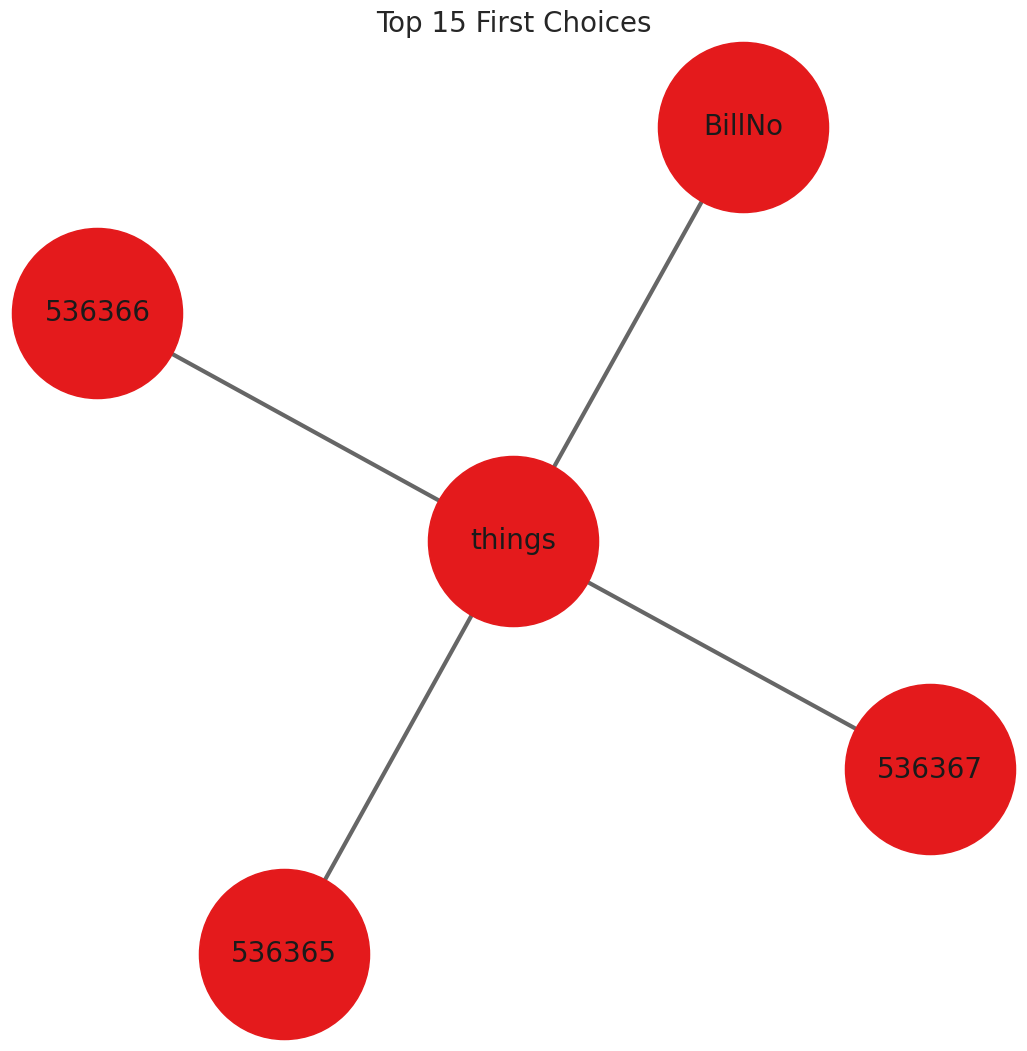

In [26]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(things)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(things, pos, node_size = 15000, node_color = color)
nx.draw_networkx_edges(things, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(things, pos, font_size = 20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 20)
plt.show()

In [74]:
# Getting the list of transactions from the dataset
transactions = []
for i in range(0, len(df)):
    transactions.append([str(df.values[i,j]) for j in range(0, len(df.columns))])

KeyboardInterrupt: 

In [30]:
transactions[:1]

[['BillNo',
  'Itemname',
  'Quantity',
  'Date',
  'Price',
  'CustomerID',
  'Country',
  'things']]

In [35]:
from itertools import permutations

# Extract unique items.
flattened = [item for transaction in transactions for item in transaction]
items = list(set(flattened))

In [36]:
print('# of items:',len(items))
print(list(items))

# of items: 1533
['RIBBON REEL MAKING SNOWMEN', 'WOODEN HEART CHRISTMAS SCANDINAVIAN', '2010-12-01 11:21:00', 'CHRISTMAS GINGHAM HEART', 'EASTER BUNNY GARLAND OF FLOWERS', 'COOK WITH WINE METAL SIGN', '536365', 'TEA BAG PLATE RED RETROSPOT', 'JUMBO  BAG BAROQUE BLACK WHITE', '16218', '17920', 'ALARM CLOCK BAKELIKE RED', '8.5', 'FANCY FONTS BIRTHDAY WRAP', 'CAKES AND BOWS GIFT  TAPE', 'SET OF 6 SOLDIER SKITTLES', '0.24', '536375', 'IVORY DINER WALL CLOCK', 'GREEN CHRISTMAS TREE CARD HOLDER', '15513', 'CREAM SLICE FLANNEL PINK SPOT', 'BIRTHDAY CARD, RETRO SPOT', 'MIDNIGHT BLUE PAIR HEART HAIR SLIDE', 'ROSE DU SUD COSMETICS BAG', 'ROMANTIC PINKS RIBBONS', 'BLACK MINI TAPE MEASURE', 'CHRISTMAS MUSICAL ZINC HEART', 'ASSORTED MINI MADRAS NOTEBOOK', 'CALENDAR IN SEASON DESIGN', 'HOT WATER BOTTLE BABUSHKA', 'SET OF 4 NAPKIN CHARMS INSTRUMENT', 'SMALL REGAL  SILVER CANDLEPOT', 'PACK 3 BOXES BIRD PANNETONE', 'PAPER BUNTING RETROSPOT', 'RIBBON REEL CHRISTMAS PRESENT', 'APPLE BATH SPONGE', '5 HOOK

In [37]:
if 'nan' in items: items.remove('nan')
print(list(items))

['RIBBON REEL MAKING SNOWMEN', 'WOODEN HEART CHRISTMAS SCANDINAVIAN', '2010-12-01 11:21:00', 'CHRISTMAS GINGHAM HEART', 'EASTER BUNNY GARLAND OF FLOWERS', 'COOK WITH WINE METAL SIGN', '536365', 'TEA BAG PLATE RED RETROSPOT', 'JUMBO  BAG BAROQUE BLACK WHITE', '16218', '17920', 'ALARM CLOCK BAKELIKE RED', '8.5', 'FANCY FONTS BIRTHDAY WRAP', 'CAKES AND BOWS GIFT  TAPE', 'SET OF 6 SOLDIER SKITTLES', '0.24', '536375', 'IVORY DINER WALL CLOCK', 'GREEN CHRISTMAS TREE CARD HOLDER', '15513', 'CREAM SLICE FLANNEL PINK SPOT', 'BIRTHDAY CARD, RETRO SPOT', 'MIDNIGHT BLUE PAIR HEART HAIR SLIDE', 'ROSE DU SUD COSMETICS BAG', 'ROMANTIC PINKS RIBBONS', 'BLACK MINI TAPE MEASURE', 'CHRISTMAS MUSICAL ZINC HEART', 'ASSORTED MINI MADRAS NOTEBOOK', 'CALENDAR IN SEASON DESIGN', 'HOT WATER BOTTLE BABUSHKA', 'SET OF 4 NAPKIN CHARMS INSTRUMENT', 'SMALL REGAL  SILVER CANDLEPOT', 'PACK 3 BOXES BIRD PANNETONE', 'PAPER BUNTING RETROSPOT', 'RIBBON REEL CHRISTMAS PRESENT', 'APPLE BATH SPONGE', '5 HOOK HANGER RED MAGIC

In [38]:
# Compute and print rules.
rules = list(permutations(items, 2))
print('# of rules:',len(rules))
print(rules[:5])

# of rules: 2345492
[('RIBBON REEL MAKING SNOWMEN', 'WOODEN HEART CHRISTMAS SCANDINAVIAN'), ('RIBBON REEL MAKING SNOWMEN', '2010-12-01 11:21:00'), ('RIBBON REEL MAKING SNOWMEN', 'CHRISTMAS GINGHAM HEART'), ('RIBBON REEL MAKING SNOWMEN', 'EASTER BUNNY GARLAND OF FLOWERS'), ('RIBBON REEL MAKING SNOWMEN', 'COOK WITH WINE METAL SIGN')]


In [39]:
# Import the transaction encoder function from mlxtend
from mlxtend.preprocessing import TransactionEncoder

# Instantiate transaction encoder and identify unique items
encoder = TransactionEncoder().fit(transactions)

# One-hot encode transactions
onehot = encoder.transform(transactions)

# Convert one-hot encoded data to DataFrame
onehot = pd.DataFrame(onehot, columns = encoder.columns_).drop('nan', axis=1)

# Print the one-hot encoded transaction dataset
onehot.head()

,0,0.1,0.12,0.21,0.24,0.29,0.32,0.38,0.42,0.43,0.55,0.64,0.65,0.72,0.81,0.84,0.85,0.95,1,1.06,1.25,1.26,1.28,1.45,1.48,1.49,1.55,1.65,1.66,1.69,1.85,1.95,10,10 COLOUR SPACEBOY PEN,10.17,10.65,10.95,...,WHITE METAL LANTERN,WHITE SKULL HOT WATER BOTTLE,WHITE SPOT RED CERAMIC DRAWER KNOB,WHITE WIRE EGG HOLDER,WHITE WOOD GARDEN PLANT LADDER,WICKER STAR,WICKER WREATH LARGE,WICKER WREATH SMALL,WOOD 2 DRAWER CABINET WHITE FINISH,WOOD AND GLASS MEDICINE CABINET,WOOD BLACK BOARD ANT WHITE FINISH,WOOD S/3 CABINET ANT WHITE FINISH,WOOD STOCKING CHRISTMAS SCANDISPOT,WOODEN ADVENT CALENDAR CREAM,WOODEN ADVENT CALENDAR RED,WOODEN BOX OF DOMINOES,WOODEN CROQUET GARDEN SET,WOODEN FRAME ANTIQUE WHITE,WOODEN HEART CHRISTMAS SCANDINAVIAN,WOODEN OWLS LIGHT GARLAND,WOODEN PICTURE FRAME WHITE FINISH,WOODEN ROUNDERS GARDEN SET,WOODEN SCHOOL COLOURING SET,WOODEN TREE CHRISTMAS SCANDINAVIAN,WOODLAND HEIGHT CHART STICKERS,WOODLAND CHARLOTTE BAG,WRAP CHRISTMAS SCREEN PRINT,WRAP COWBOYS,WRAP RED APPLES,YELLOW BREAKFAST CUP AND SAUCER,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,ZINC METAL HEART DECORATION,ZINC WILLIE WINKIE CANDLE STICK,things
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [40]:
# Compute the support
support = onehot.mean()
support = pd.DataFrame(support, columns=['support']).sort_values('support',ascending=False)

# Print the support
support.head()

,support
things,1.000000
United Kingdom,0.943516
1,0.342070
2010-12-01 14:32:00,0.238590
536544,0.238138


In [43]:
support.describe()

,support
count,1532.000000
mean,0.005060
std,0.038081
min,0.000452
25%,0.000452
50%,0.000904
75%,0.001808
max,1.000000


In [49]:
# Compute support for burgers and french fries
supportBF = np.logical_and(onehot['DOORMAT NEW ENGLAND'], onehot['STARS GIFT TAPE']).mean()

# Compute support for burgers and mineral water
supportBM = np.logical_and(onehot['DOORMAT NEW ENGLAND'], onehot['HOME BUILDING BLOCK WORD']).mean()

# Compute support for french fries and mineral water
supportFM = np.logical_and(onehot['STARS GIFT TAPE'], onehot['HOME BUILDING BLOCK WORD']).mean()

# Print support values
print("DOORMAT NEW ENGLAND and STARS GIFT TAPE: %.1f" % supportBF)
print(" DOORMAT NEW ENGLAND and HOME BUILDING BLOCK WORD: %.1f" % supportBM)
print("STARS GIFT TAPE and HOME BUILDING BLOCK WORD: %.1f" % supportFM)

DOORMAT NEW ENGLAND and STARS GIFT TAPE: 0.0
 DOORMAT NEW ENGLAND and HOME BUILDING BLOCK WORD: 0.0
STARS GIFT TAPE and HOME BUILDING BLOCK WORD: 0.0


In [51]:
# Add a mineral water+french fries column to the DataFrame onehot
onehot['HOME BUILDING BLOCK WORD+STARS GIFT TAPE'] = np.logical_and(onehot['HOME BUILDING BLOCK WORD'], onehot['STARS GIFT TAPE'])

# Compute the support
support = onehot.mean()
val = support.loc['HOME BUILDING BLOCK WORD+STARS GIFT TAPE']

# Print the support values
print(f'HOME BUILDING BLOCK WORD+ STARS GIFT TAPE support = {val}')

HOME BUILDING BLOCK WORD+ STARS GIFT TAPE support = 0.0


In [52]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, 
                            min_support = 0.05, 
                            max_len = 3, 
                            use_colnames = True)

# Print a preview of the frequent itemsets
frequent_itemsets.head()

,support,itemsets
0,0.066426,(0.85)
1,0.342070,(1)
2,0.088116,(1.25)
3,0.068233,(1.65)
4,0.094442,(12)


In [53]:
# Import apriori from mlxtend
from mlxtend.frequent_patterns import apriori

# Compute frequent itemsets using a support of 0.04 and length of 3
frequent_itemsets_1 = apriori(onehot, min_support = 0.04, 
                            max_len = 3, use_colnames = True)

# Compute frequent itemsets using a support of 0.05 and length of 3
frequent_itemsets_2 = apriori(onehot, min_support = 0.05, 
                            max_len = 3, use_colnames = True)

# Print the number of freqeuent itemsets
print(len(frequent_itemsets_1), len(frequent_itemsets_2))

89 63


In [54]:
# Import the association rule function from mlxtend
from mlxtend.frequent_patterns import association_rules

# Compute all association rules for frequent_itemsets_1
rules_1 = association_rules(frequent_itemsets_1, 
                            metric = "support", 
                            min_threshold = 0.001)

# Compute all association rules for frequent_itemsets_2
rules_2 = association_rules(frequent_itemsets_2, 
                            metric = "support", 
                            min_threshold = 0.002)

# Print the number of association rules generated
print(len(rules_1), len(rules_2))

270 172


In [55]:
# Import the association rules function
from mlxtend.frequent_patterns import association_rules

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.03, 
                            max_len = 2, use_colnames = True)

# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets, 
                            metric = "lift", 
                            min_threshold = 1.0)

# Print association rules
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         174 non-null    object 
 1   consequents         174 non-null    object 
 2   antecedent support  174 non-null    float64
 3   consequent support  174 non-null    float64
 4   support             174 non-null    float64
 5   confidence          174 non-null    float64
 6   lift                174 non-null    float64
 7   leverage            174 non-null    float64
 8   conviction          174 non-null    float64
 9   zhangs_metric       174 non-null    float64
dtypes: float64(8), object(2)
memory usage: 13.7+ KB


In [56]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(things),(0.42),1.000000,0.031179,0.031179,0.031179,1.000000,0.000000,1.000000,0.000000
1,(0.42),(things),0.031179,1.000000,0.031179,1.000000,1.000000,0.000000,inf,0.000000
2,(0.85),(things),0.066426,1.000000,0.066426,1.000000,1.000000,0.000000,inf,0.000000
3,(things),(0.85),1.000000,0.066426,0.066426,0.066426,1.000000,0.000000,1.000000,0.000000
4,(1),(2010-12-01 14:32:00),0.342070,0.238590,0.135563,0.396301,1.661012,0.053948,1.261241,0.604863


In [57]:
# Import the association rules function
from mlxtend.frequent_patterns import apriori, association_rules

# Compute frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(onehot, min_support = 0.03, 
                            max_len = 2, use_colnames = True)

# Compute all association rules using confidence
rules = association_rules(frequent_itemsets, 
                            metric = "confidence", 
                            min_threshold = 0.4)

# Print association rules
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         112 non-null    object 
 1   consequents         112 non-null    object 
 2   antecedent support  112 non-null    float64
 3   consequent support  112 non-null    float64
 4   support             112 non-null    float64
 5   confidence          112 non-null    float64
 6   lift                112 non-null    float64
 7   leverage            112 non-null    float64
 8   conviction          112 non-null    float64
 9   zhangs_metric       112 non-null    float64
dtypes: float64(8), object(2)
memory usage: 8.9+ KB


In [58]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0.42),(things),0.031179,1.000000,0.031179,1.000000,1.000000,0.000000,inf,0.000000
1,(0.85),(United Kingdom),0.066426,0.943516,0.062359,0.938776,0.994976,-0.000315,0.922579,-0.005379
2,(0.85),(things),0.066426,1.000000,0.066426,1.000000,1.000000,0.000000,inf,0.000000
3,(2010-12-01 14:32:00),(1),0.238590,0.342070,0.135563,0.568182,1.661012,0.053948,1.523628,0.522659
4,(536544),(1),0.238138,0.342070,0.135111,0.567362,1.658617,0.053651,1.520743,0.521208


In [62]:
# Funtion to compute Zhang's rule from mlxtend association_rules output
def zhangs_rule(rules):
    PAB = rules['support'].copy()
    PA = rules['antecedent support'].copy()
    PB = rules['consequent support'].copy()
    NUMERATOR = PAB - PA*PB
    DENOMINATOR = np.max((PAB*(1-PA).values,PA*(PB-PAB).values), axis = 0)
    return NUMERATOR / DENOMINATOR

In [63]:
# Generate the initial set of rules using a minimum lift of 1.00
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1.00)

# Set antecedent support to 0.04
rules = rules[rules['antecedent support'] > 0.04]

# Set consequent support to 0.04
rules = rules[rules['consequent support'] > 0.04]

# Compute Zhang's rule
rules['zhang'] = zhangs_rule(rules)

# Set the lower bound for Zhang's rule to 0.5
rules = rules[rules['zhang'] > 0.5]
rules[['antecedents', 'consequents']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 4 to 158
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   antecedents  16 non-null     object
 1   consequents  16 non-null     object
dtypes: object(2)
memory usage: 384.0+ bytes


In [64]:
rules.tail()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
114,(2010-12-01 14:32:00),(536544),0.238590,0.238138,0.238138,0.998106,4.191288,0.181321,402.262991,1.000000,1.000000
115,(536544),(2010-12-01 14:32:00),0.238138,0.238590,0.238138,1.000000,4.191288,0.181321,inf,0.999407,0.999407
116,(United Kingdom),(2010-12-01 14:32:00),0.943516,0.238590,0.238590,0.252874,1.059866,0.013477,1.019118,1.000000,1.000000
128,(United Kingdom),(3),0.943516,0.077723,0.076819,0.081418,1.047542,0.003486,1.004023,0.803482,0.803482
158,(United Kingdom),(536544),0.943516,0.238138,0.238138,0.252395,1.059866,0.013451,1.019069,1.000000,1.000000


In [65]:
# Apply the Apriori algorithm with a minimum support threshold of 0.04
frequent_itemsets = apriori(onehot, min_support = 0.04, use_colnames = True)

# Recover association rules using a minium support threshold of 0.01
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.01)

# Apply a 0.002 antecedent support threshold, 0.01 confidence threshold, and 2.50 lift threshold
filtered_rules = rules[(rules['antecedent support'] > 0.002) &
                       (rules['consequent support'] > 0.01) &
                       (rules['confidence'] > 0.60) &
                       (rules['lift'] > 2.50)]

# Print remaining rule
filtered_rules[['antecedents','consequents']]

,antecedents,consequents
37,(2.51),(2010-12-01 14:32:00)
38,(2.51),(536544)
48,(2010-12-01 14:32:00),(536544)
49,(536544),(2010-12-01 14:32:00)
84,"(2010-12-01 14:32:00, 1)",(536544)
...,...,...
528,"(United Kingdom, 2.51)","(2010-12-01 14:32:00, 536544, things)"
531,"(2.51, 536544)","(United Kingdom, 2010-12-01 14:32:00, things)"
534,"(2010-12-01 14:32:00, 2.51)","(United Kingdom, 536544, things)"
535,"(2.51, things)","(United Kingdom, 2010-12-01 14:32:00, 536544)"


In [66]:
# Apply the apriori algorithm
frequent_itemsets = apriori(onehot, min_support=0.15, use_colnames=True, max_len=2)

# Recover the association rules
rules = association_rules(frequent_itemsets)

rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         12 non-null     object 
 1   consequents         12 non-null     object 
 2   antecedent support  12 non-null     float64
 3   consequent support  12 non-null     float64
 4   support             12 non-null     float64
 5   confidence          12 non-null     float64
 6   lift                12 non-null     float64
 7   leverage            12 non-null     float64
 8   conviction          12 non-null     float64
 9   zhangs_metric       12 non-null     float64
dtypes: float64(8), object(2)
memory usage: 1.1+ KB


In [67]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(1),(United Kingdom),0.342070,0.943516,0.341166,0.997358,1.057066,0.018418,21.379349,0.082053
1,(1),(things),0.342070,1.000000,0.342070,1.000000,1.000000,0.000000,inf,0.000000
2,(2),(United Kingdom),0.154993,0.943516,0.153186,0.988338,1.047506,0.006947,4.843538,0.053670
3,(2),(things),0.154993,1.000000,0.154993,1.000000,1.000000,0.000000,inf,0.000000
4,(2010-12-01 14:32:00),(536544),0.238590,0.238138,0.238138,0.998106,4.191288,0.181321,402.262991,1.000000


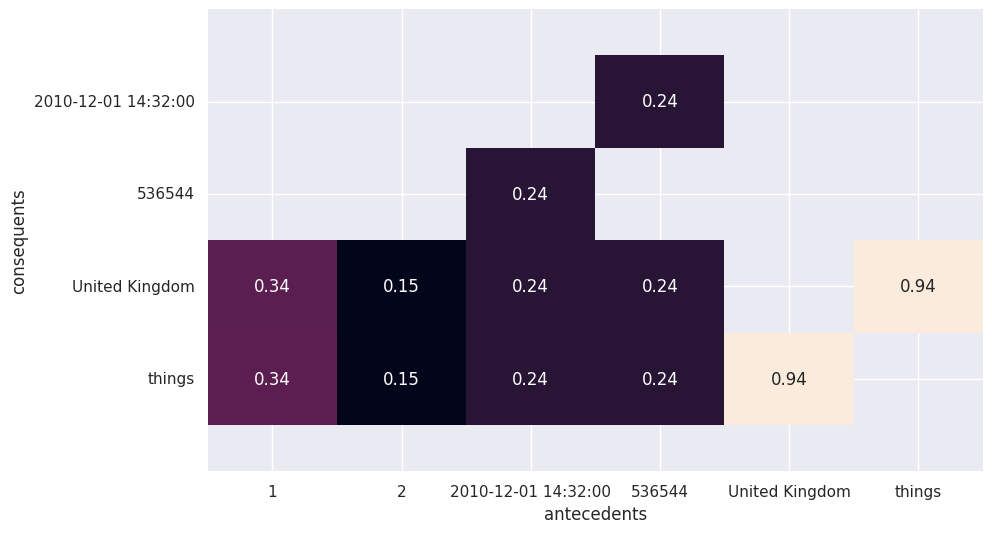

In [68]:
# Convert antecedents and consequents into strings
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform antecedent, consequent, and support columns into matrix
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')

plt.figure(figsize=(10,6))
sns.heatmap(support_table, annot=True, cbar=False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.show() 

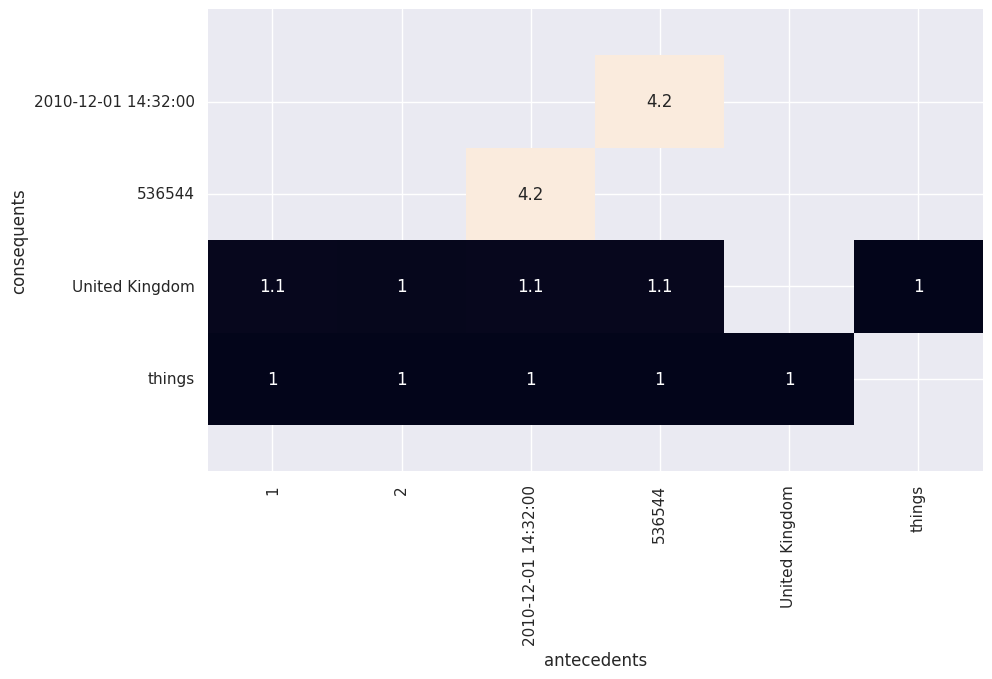

In [69]:
# Import seaborn under its standard alias
import seaborn as sns

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules.pivot(index = 'consequents', 
                    columns = 'antecedents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot = True, cbar = False)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

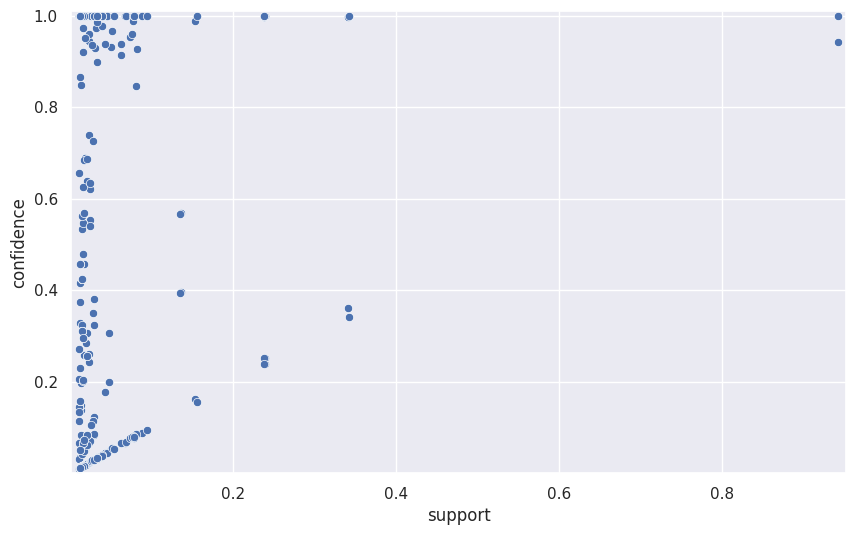

In [70]:
## Apply the Apriori algorithm with a support value of 0.0095
frequent_itemsets = apriori(onehot, min_support = 0.0095, 
                            use_colnames = True, max_len = 2)

# Generate association rules without performing additional pruning
rules = association_rules(frequent_itemsets, metric='support', 
                          min_threshold = 0.0)

# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", data = rules)
plt.margins(0.01,0.01)
plt.show()

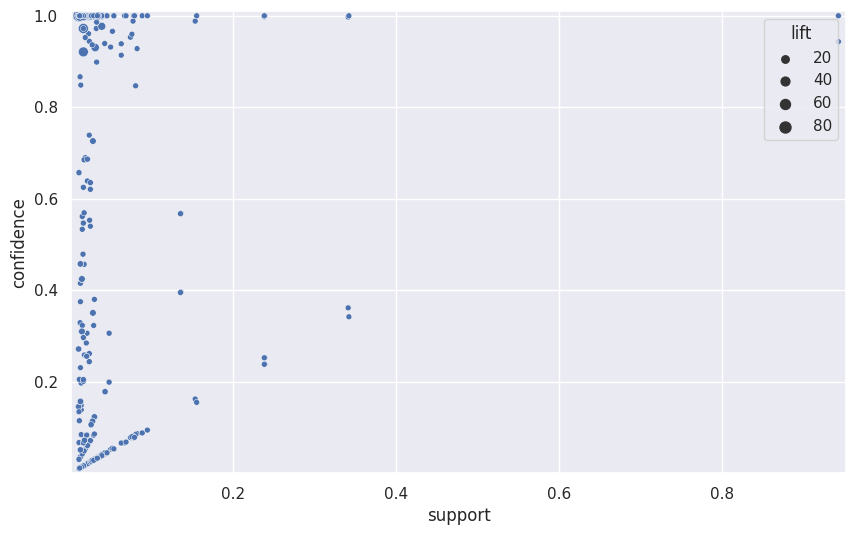

In [71]:
# Generate scatterplot using support and confidence
plt.figure(figsize=(10,6))
sns.scatterplot(x = "support", y = "confidence", 
                size = "lift", data = rules)
plt.margins(0.01,0.01)
plt.show()

In [72]:
# Function to convert rules to coordinates.
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

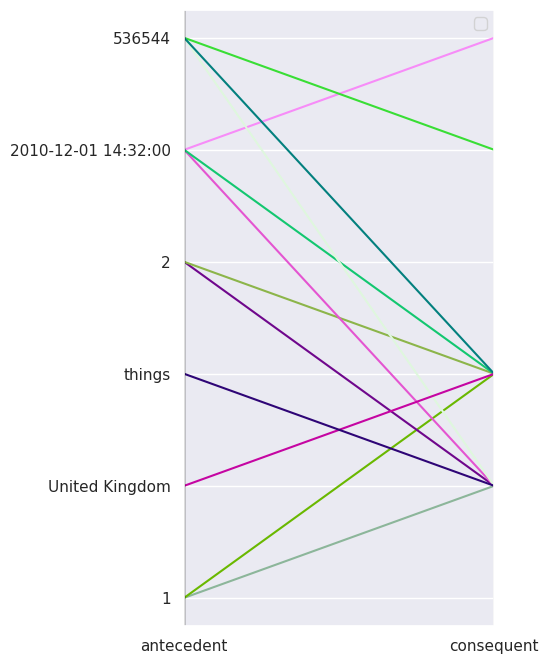

In [73]:
from pandas.plotting import parallel_coordinates

# Compute the frequent itemsets
frequent_itemsets = apriori(onehot, min_support = 0.15, 
                            use_colnames = True, max_len = 2)

# Compute rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric = 'confidence', 
                          min_threshold = 0.55)

# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)

# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule')
plt.legend([])
plt.grid(True)
plt.show()